In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
outname = './EChO.log'

# The output format is like:
# cv= 4.3047 T= 300.677 pot= 0.996 chg_net -0.000 gcfe= -961.064 epot= -966.405 z= 1.062 fe_grad= 2.197

cv = []
temperature = []
potential = []
net_charge = []
gcfe = []
epot = []
fe_grad = []

for l in open(outname).readlines():
    if l[:2] == 'cv':
        tmp = l.split()
        cv.append(eval(tmp[1]))
        temperature.append(eval(tmp[3]))
        potential.append(eval(tmp[5]))
        net_charge.append(eval(tmp[7]))
        gcfe.append(eval(tmp[9]))
        epot.append(eval(tmp[11]))
        fe_grad.append(eval(tmp[15]))


Text(0.5, 0, 'Reaction coordinate $\\xi$ ($\\mathrm{\\AA}$)')

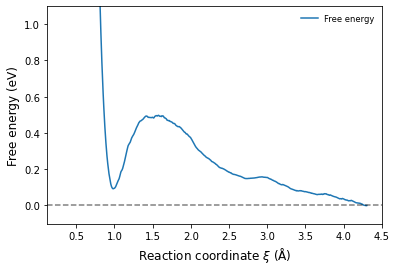

In [7]:
# Thermodynamic intergration
fe = [np.trapz(fe_grad[:i])*(cv[1]-cv[0]) for i in range(len(fe_grad))]

plt.plot(cv, fe, label='Free energy')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

plt.legend(frameon=False, fontsize='small')

plt.ylim(min(fe) - 0.1, min(fe) + 1.1)
plt.ylabel('Free energy (eV)', fontsize='large')
plt.xlabel('Reaction coordinate $\\xi$ ($\\mathrm{\\AA}$)', fontsize='large')

#plt.savefig('fes.pdf', bbox_inches = "tight", transparent=True)